#### SIADS 696 Milestone II

In [29]:
import pandas as pd
import numpy as np
from data_columns import childhood, demographic, diagnosis, all
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [3]:
init_df = pd.read_csv('./data/mental-health-comorbidity-raw.csv')
init_df.shape

(5001, 1000)

In [4]:
df = init_df[all()].copy()
# df = df.replace(-9, np.nan)
# df = df.dropna()
df.shape

(5001, 122)

In [5]:
def get_categorical_columns(df, exclude):
    return [col for col in df.columns if col not in exclude]

In [6]:
demographic_df = df[demographic()].copy()
num_columns = ["HHSIZE","AGE"]
cat_columns = get_categorical_columns(demographic_df, num_columns)
demographic_df[cat_columns] = demographic_df[cat_columns].astype("category")

demographic_df.columns

Index(['REGION', 'HHSIZE', 'RESEX', 'AGE', 'AGECAT', 'EDUCAT', 'MARCAT',
       'EMPCAT', 'PEREARN2', 'SPEARN2', 'OTHINC2', 'HHINCOME2', 'INCPERCAP2',
       'INC_CAT'],
      dtype='object')

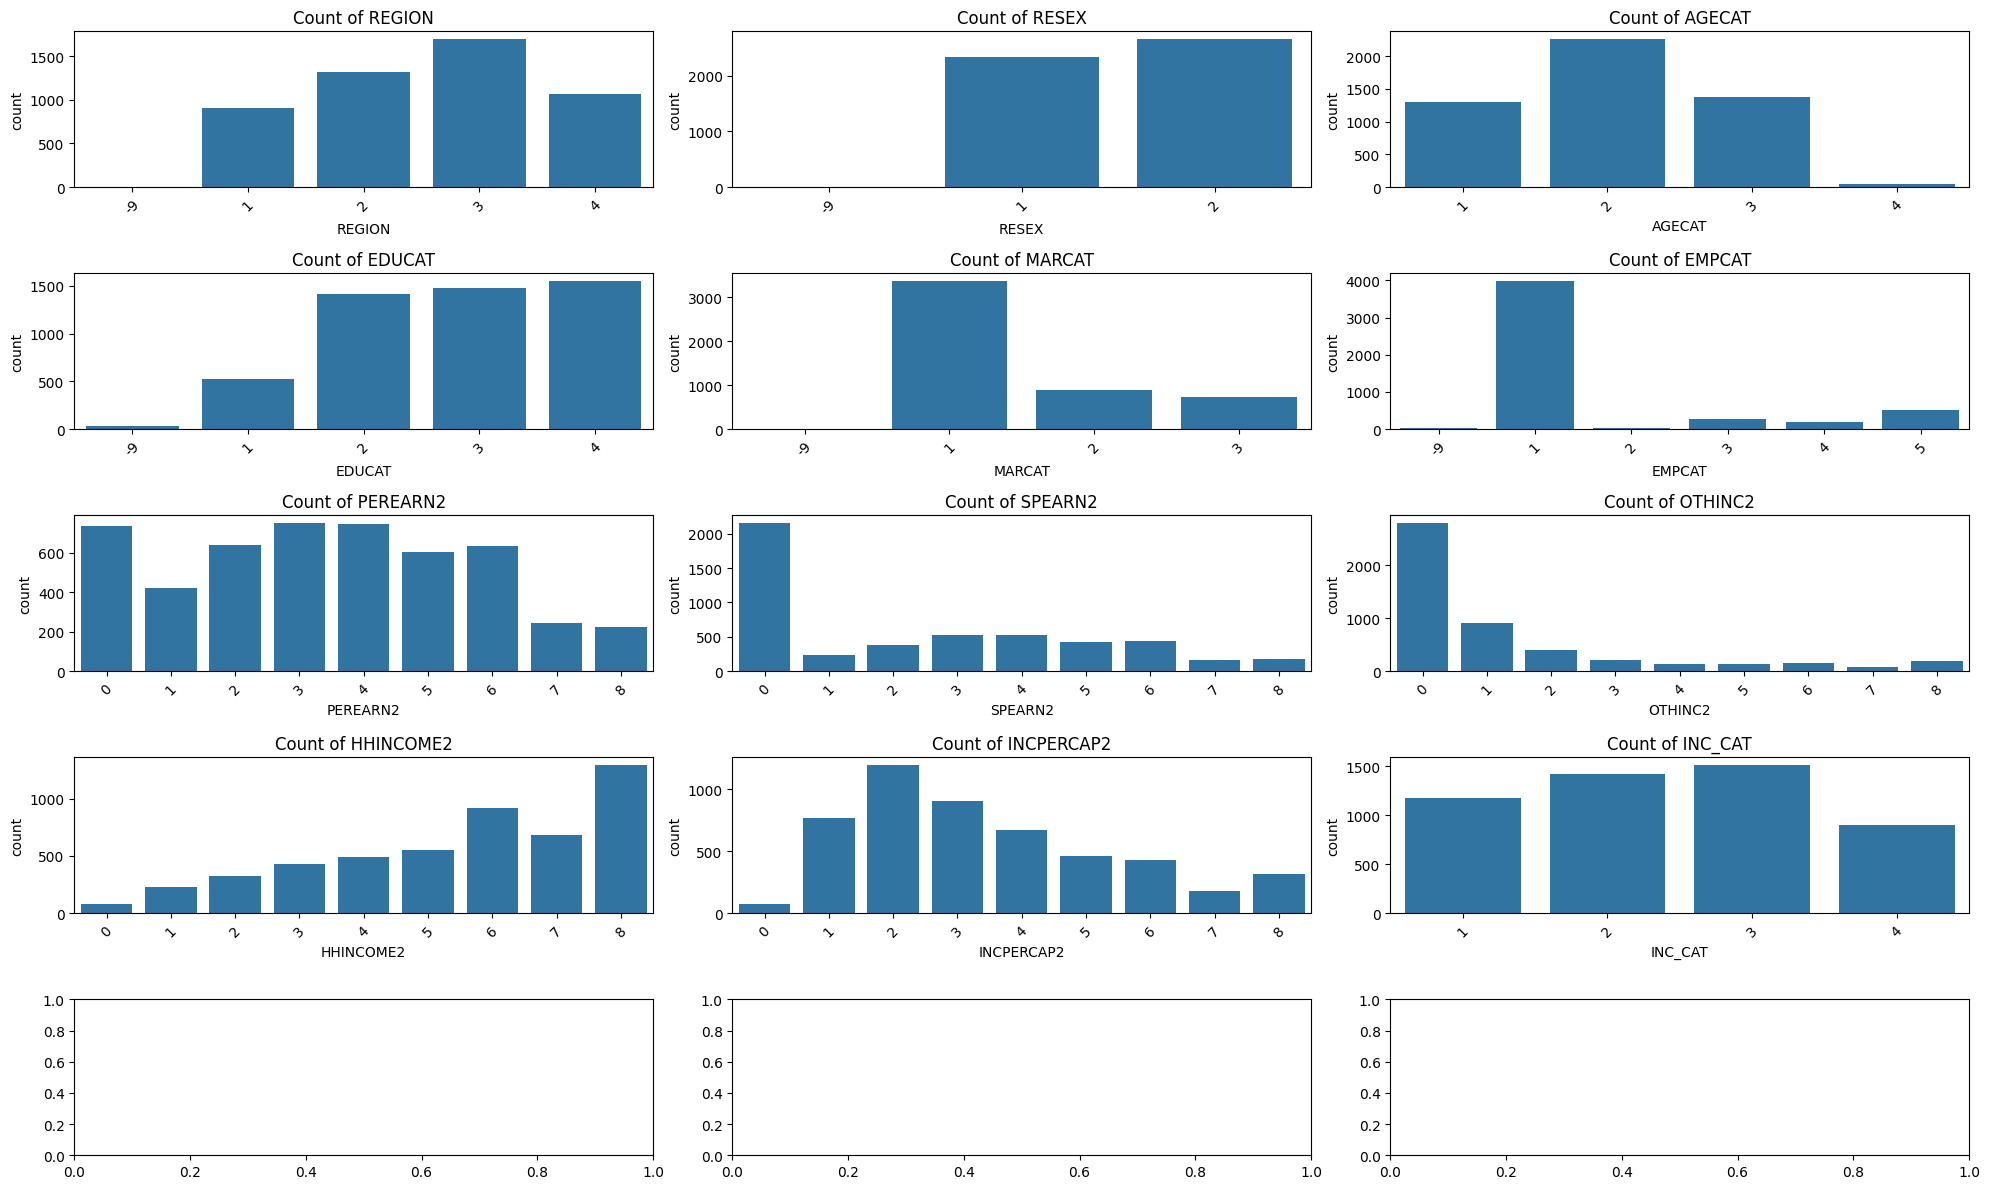

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(x=col, data=demographic_df, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [8]:
columns2 = demographic() + childhood() + ['DSM_MJD']
num_columns = ["HHSIZE","AGE"] + ["CH13","CH14","CH16","CH21","CH22","CH24","CH38","CH43","CH45"]
child_df = df[columns2].copy()

child_df = child_df.replace(-9, np.nan)
child_df = child_df.dropna()

cat_columns = [col for col in child_df.columns if col not in num_columns]
child_df[cat_columns] = child_df[cat_columns].astype('category')
df[num_columns] = df[num_columns].astype(int)


In [9]:
X = child_df.drop(columns=['DSM_MJD'])
y = child_df['DSM_MJD']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.30      0.34      0.32       197
           5       0.83      0.81      0.82       795

    accuracy                           0.71       992
   macro avg       0.57      0.57      0.57       992
weighted avg       0.72      0.71      0.72       992



In [31]:
cat_columns = [col for col in cat_columns if col != 'DSM_MJD']

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_columns),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_columns)
])

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.35      0.10      0.16       197
           5       0.81      0.95      0.88       795

    accuracy                           0.78       992
   macro avg       0.58      0.53      0.52       992
weighted avg       0.72      0.78      0.73       992



/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
u_smpl = RandomUnderSampler(random_state = 42) 

X_u_smpl, y_u_smpl = u_smpl.fit_resample(X_train,y_train)

pipeline.fit(X_u_smpl, y_u_smpl)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.27      0.54      0.36       197
           5       0.85      0.64      0.73       795

    accuracy                           0.62       992
   macro avg       0.56      0.59      0.54       992
weighted avg       0.73      0.62      0.65       992



/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: xlabel='DSM_MJD'>

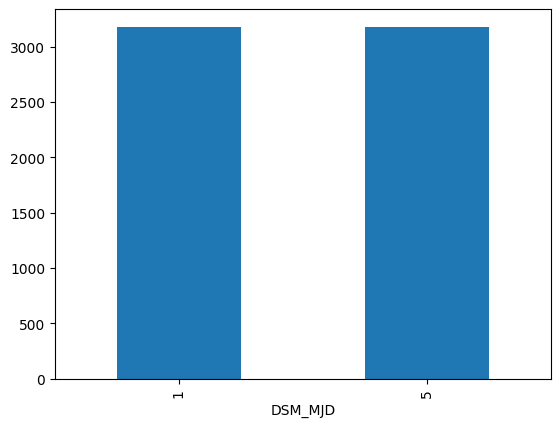

In [38]:
o_smpl = RandomOverSampler(random_state = 42) 
X_o_smpl, y_o_smpl = o_smpl.fit_resample(X_train,y_train)
y_o_smpl.value_counts().plot.bar()

In [39]:
pipeline.fit(X_o_smpl, y_o_smpl)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.28      0.50      0.36       197
           5       0.85      0.68      0.75       795

    accuracy                           0.64       992
   macro avg       0.56      0.59      0.55       992
weighted avg       0.73      0.64      0.67       992



/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: xlabel='DSM_MJD'>

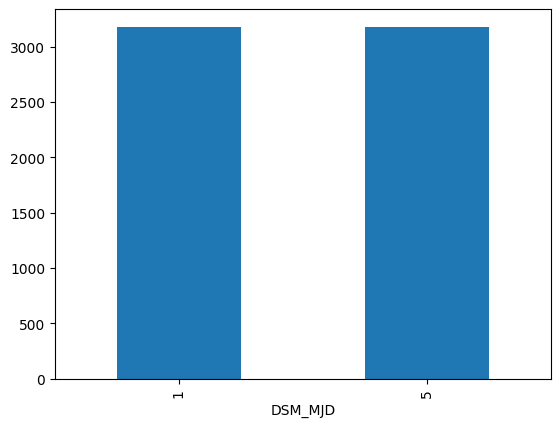

In [ ]:
smote = SMOTE(random_state = 42) 
X_smote, y_smote = smote.fit_resample(X_train,y_train)

y_smote.value_counts().plot.bar()

In [40]:
pipeline.fit(X_smote, y_smote)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.37      0.11      0.17       197
           5       0.81      0.95      0.88       795

    accuracy                           0.79       992
   macro avg       0.59      0.53      0.52       992
weighted avg       0.72      0.79      0.74       992



/Users/samroska/github/milestone-2-siads-696/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
